In [15]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta

In [13]:
df = fdr.DataReader('005930', '2023-08-07', '2023-08-08')  #NHN주식정보
dfclose = df['Close']
dfclose

Date
2023-08-07    68500
2023-08-08    67600
Name: Close, dtype: int64

In [23]:
a=df.index
a

DatetimeIndex(['2023-08-07', '2023-08-08'], dtype='datetime64[ns]', name='Date', freq=None)

In [21]:
b = a + datetime.timedelta(minutes=10)

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

In [28]:
c=pd.date_range('2023-08-07 09:00', '2023-08-08 17:30',freq="T")

In [ ]:
df.index=['2023-08-07 09:00:00','2023-08-08 17:30:00']

In [47]:
df

,Open,High,Low,Close,Volume,Change
2023-08-07 09:00:00,67700,69200,67600,68500,10968505,0.002928
2023-08-08 17:30:00,69000,69100,67400,67600,14631290,-0.013139


In [48]:
df.index=pd.to_datetime(df.index)

In [49]:
df

,Open,High,Low,Close,Volume,Change
2023-08-07 09:00:00,67700,69200,67600,68500,10968505,0.002928
2023-08-08 17:30:00,69000,69100,67400,67600,14631290,-0.013139


In [51]:
df1=df.resample('T').last()

In [52]:
df1

,Open,High,Low,Close,Volume,Change
2023-08-07 09:00:00,67700.0,69200.0,67600.0,68500.0,10968505.0,0.002928
2023-08-07 09:01:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-07 09:02:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-07 09:03:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-07 09:04:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-08-08 17:26:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-08 17:27:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-08 17:28:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-08 17:29:00,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df2=df1.interpolate()

In [58]:
df2['Close']

2023-08-07 09:00:00    68500.000000
2023-08-07 09:01:00    68499.538462
2023-08-07 09:02:00    68499.076923
2023-08-07 09:03:00    68498.615385
2023-08-07 09:04:00    68498.153846
                           ...     
2023-08-08 17:26:00    67601.846154
2023-08-08 17:27:00    67601.384615
2023-08-08 17:28:00    67600.923077
2023-08-08 17:29:00    67600.461538
2023-08-08 17:30:00    67600.000000
Freq: T, Name: Close, Length: 1951, dtype: float64

In [90]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [91]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [92]:
df = fdr.DataReader('005930', '2018-01-01', '2023-01-01')

dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2018-01-02,0.568992,0.530992,0.567374,0.001877
2018-01-03,0.581838,0.542975,0.574525,0.002218
2018-01-04,0.577187,0.539050,0.565810,0.002590
2018-01-05,0.568106,0.538430,0.572067,0.002100
2018-01-08,0.580288,0.542562,0.575419,0.001857
...,...,...,...,...
2022-12-23,0.644518,0.603306,0.644693,0.108845
2022-12-26,0.642303,0.600207,0.644693,0.074817
2022-12-27,0.642303,0.603306,0.646927,0.118121


In [93]:
dfx=dfx.reset_index()
dfx

,Date,Open,High,Low,Volume
0,2018-01-02,0.568992,0.530992,0.567374,0.001877
1,2018-01-03,0.581838,0.542975,0.574525,0.002218
2,2018-01-04,0.577187,0.539050,0.565810,0.002590
3,2018-01-05,0.568106,0.538430,0.572067,0.002100
4,2018-01-08,0.580288,0.542562,0.575419,0.001857
...,...,...,...,...,...
1227,2022-12-23,0.644518,0.603306,0.644693,0.108845
1228,2022-12-26,0.642303,0.600207,0.644693,0.074817
1229,2022-12-27,0.642303,0.603306,0.646927,0.118121
1230,2022-12-28,0.637874,0.595041,0.630168,0.162397


In [94]:
dfx=dfx.set_index(keys='Date')
dfx

,Open,High,Low,Volume
Date,,,,
2018-01-02,0.568992,0.530992,0.567374,0.001877
2018-01-03,0.581838,0.542975,0.574525,0.002218
2018-01-04,0.577187,0.539050,0.565810,0.002590
2018-01-05,0.568106,0.538430,0.572067,0.002100
2018-01-08,0.580288,0.542562,0.575419,0.001857
...,...,...,...,...
2022-12-23,0.644518,0.603306,0.644693,0.108845
2022-12-26,0.642303,0.600207,0.644693,0.074817
2022-12-27,0.642303,0.603306,0.646927,0.118121


In [95]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [96]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)

In [97]:
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

In [98]:
validation_data = (val_X,val_y)

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:
model = Sequential()
model.add(LSTM(
    units=128, 
    activation='relu', 
    return_sequences=True, 
    input_shape=(10, 4)))


model.add(Dropout(0.2))


model.add(LSTM(
    units=128, 
    activation='relu',
    return_sequences=True, ))


model.add(Dropout(0.2))


model.add(LSTM(
    units=128, 
    activation='relu',
    return_sequences=True, ))


model.add(Dropout(0.2))



model.add(Dense(units=1))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           68096     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 10, 128)           0         
                                                                 
 dense (Dense)               (None, 10, 1)             1

In [ ]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae','acc']
             )
model.fit(train_X, 
          train_y, 
          epochs=300, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model.predict(test_X)

1/1 [==============================] - 0s 23ms/step


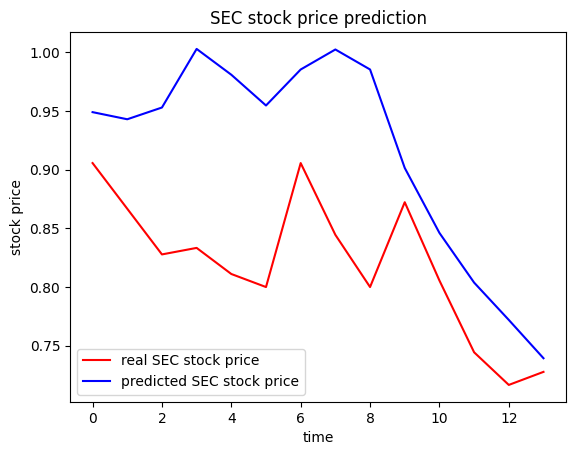

In [111]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [112]:
mse = model.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model.predict(test_X)
print(y_predict)

1/1 [==============================] - 0s 26ms/step - loss: 0.0128 - mae: 0.0969 - acc: 0.0000e+00
mse : [0.012819823808968067, 0.09692777693271637, 0.0]
1/1 [==============================] - 0s 22ms/step
[[0.9489177 ]
 [0.94284976]
 [0.95284945]
 [1.0027404 ]
 [0.9807581 ]
 [0.9545729 ]
 [0.9852234 ]
 [1.0022626 ]
 [0.98523223]
 [0.9014077 ]
 [0.8461003 ]
 [0.8037891 ]
 [0.7720012 ]
 [0.7393953 ]]


In [113]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.11322466071922282
R2 : -2.8735789612487688


In [114]:
df = fdr.DataReader('005930', '2023-01-01', '2023-08-07')

dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]

In [115]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [116]:
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')
X = dfx.values.tolist()
y = dfy.values.tolist()

window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])


validation_data = (val_X,val_y)

1/1 [==============================] - 0s 30ms/step


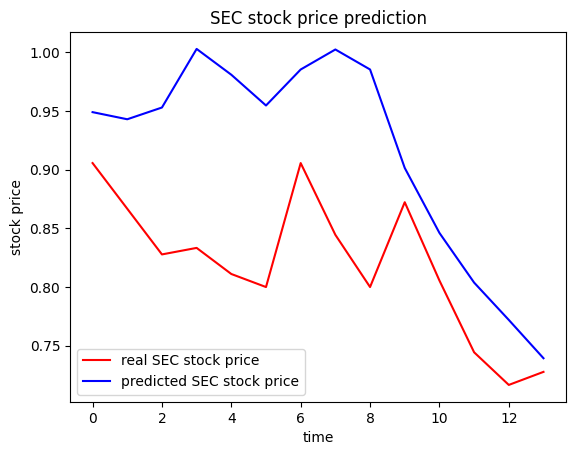

In [122]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [123]:
mse = model.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model.predict(test_X)
print(y_predict)

1/1 [==============================] - 0s 35ms/step - loss: 0.0128 - mae: 0.0969 - acc: 0.0000e+00
mse : [0.012819823808968067, 0.09692777693271637, 0.0]
1/1 [==============================] - 0s 24ms/step
[[0.9489177 ]
 [0.94284976]
 [0.95284945]
 [1.0027404 ]
 [0.9807581 ]
 [0.9545729 ]
 [0.9852234 ]
 [1.0022626 ]
 [0.98523223]
 [0.9014077 ]
 [0.8461003 ]
 [0.8037891 ]
 [0.7720012 ]
 [0.7393953 ]]


In [124]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.11322466071922282
R2 : -2.8735789612487688


In [125]:
pred_y

array([[0.9489177 ],
       [0.94284976],
       [0.95284945],
       [1.0027404 ],
       [0.9807581 ],
       [0.9545729 ],
       [0.9852234 ],
       [1.0022626 ],
       [0.98523223],
       [0.9014077 ],
       [0.8461003 ],
       [0.8037891 ],
       [0.7720012 ],
       [0.7393953 ]], dtype=float32)

In [126]:
len(data_X)

139

1/1 [==============================] - 0s 23ms/step


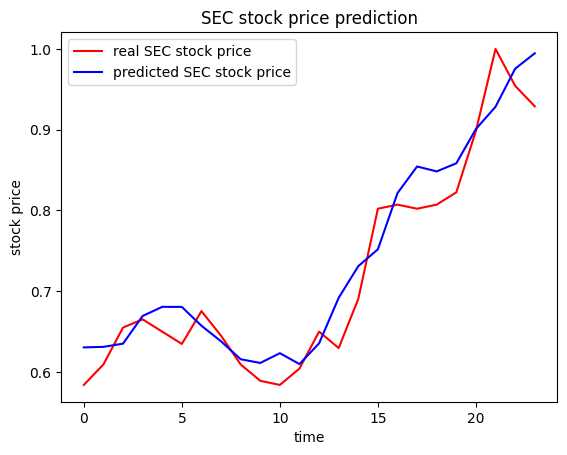

In [127]:
df = fdr.DataReader('005930', '2022-06-01', '2023-06-01')

dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]

dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')
X = dfx.values.tolist()
y = dfy.values.tolist()

window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])


validation_data = (val_X,val_y)

pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [142]:
mse = model.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model.predict(test_X)
print(y_predict)

1/1 [==============================] - 0s 24ms/step - loss: 0.0691 - mae: 0.2540 - acc: 0.0417
mse : [0.0690809041261673, 0.25404754281044006, 0.0416666679084301]
1/1 [==============================] - 0s 21ms/step
[[0.43610185]
 [0.4183928 ]
 [0.40002358]
 [0.3910683 ]
 [0.38915703]
 [0.38410044]
 [0.38066006]
 [0.38732913]
 [0.39597434]
 [0.4061855 ]
 [0.41218114]
 [0.409989  ]
 [0.40222654]
 [0.39899758]
 [0.39652377]
 [0.40327492]
 [0.43191397]
 [0.46887892]
 [0.51012456]
 [0.55198705]
 [0.6045681 ]
 [0.6650751 ]
 [0.7422789 ]
 [0.81026244]]


In [143]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.26283246218532585
R2 : -3.346047929807291


In [2]:
import json

In [60]:
with open('./sam.json','r') as f:
    res=json.load(f)

In [61]:
res

{'20230808090039': {'iscd_stat_cls_code': '55',
  'marg_rate': '20.00',
  'rprs_mrkt_kor_name': 'KOSPI200',
  'bstp_kor_isnm': '전기.전자',
  'temp_stop_yn': 'N',
  'oprc_rang_cont_yn': 'N',
  'clpr_rang_cont_yn': 'N',
  'crdt_able_yn': 'Y',
  'grmn_rate_cls_code': '40',
  'elw_pblc_yn': 'Y',
  'stck_prpr': '69000',
  'prdy_vrss': '500',
  'prdy_vrss_sign': '2',
  'prdy_ctrt': '0.73',
  'acml_tr_pbmn': '17172953100',
  'acml_vol': '248966',
  'prdy_vrss_vol_rate': '2.27',
  'stck_oprc': '69000',
  'stck_hgpr': '69100',
  'stck_lwpr': '68800',
  'stck_mxpr': '89000',
  'stck_llam': '48000',
  'stck_sdpr': '68500',
  'wghn_avrg_stck_prc': '68977.72',
  'hts_frgn_ehrt': '53.02',
  'frgn_ntby_qty': '4825',
  'pgtr_ntby_qty': '-25025',
  'pvt_scnd_dmrs_prc': '70033',
  'pvt_frst_dmrs_prc': '69266',
  'pvt_pont_val': '68433',
  'pvt_frst_dmsp_prc': '67666',
  'pvt_scnd_dmsp_prc': '66833',
  'dmrs_val': '69650',
  'dmsp_val': '68050',
  'cpfn': '7780',
  'rstc_wdth_prc': '20500',
  'stck_fcam': '

In [62]:
for time in res.keys():
    print(time)
    print(res[time]['stck_prpr'])

20230808090039
69000
20230808090139
68800
20230808090239
68900
20230808090339
69000
20230808090439
68900
20230808090540
68900
20230808090640
69000
20230808090740
69000
20230808090840
68900
20230808090940
68900
20230808091040
68900
20230808091140
68800
20230808091240
68900
20230808091340
68800
20230808091440
68800
20230808091540
68800
20230808091640
68700
20230808091740
68700
20230808091840
68700
20230808091940
68700
20230808092041
68800
20230808092141
68800
20230808092241
68700
20230808092341
68700
20230808092441
68700
20230808092541
68800
20230808092641
68700
20230808092741
68700
20230808092841
68700
20230808092941
68700
20230808093041
68800
20230808093141
68800
20230808093241
68800
20230808093342
68900
20230808093442
68900
20230808093542
68800
20230808093642
68800
20230808093742
68800
20230808093842
68800
20230808093942
68800
20230808094042
68700
20230808094142
68700
20230808094242
68700
20230808094342
68700
20230808094442
68700
20230808094542
68700
20230808094642
68700
2023080809474

In [63]:
import pandas as pd
df = pd.DataFrame()

In [64]:
newdic={}
timeonly=[]
vl=[]

for time in res.keys():
    timeonly.append(time)
    vl.append(res[time]['stck_prpr'])
    
    newdic[time]=res[time]['stck_prpr']

In [65]:
newdic

{'20230808090039': '69000',
 '20230808090139': '68800',
 '20230808090239': '68900',
 '20230808090339': '69000',
 '20230808090439': '68900',
 '20230808090540': '68900',
 '20230808090640': '69000',
 '20230808090740': '69000',
 '20230808090840': '68900',
 '20230808090940': '68900',
 '20230808091040': '68900',
 '20230808091140': '68800',
 '20230808091240': '68900',
 '20230808091340': '68800',
 '20230808091440': '68800',
 '20230808091540': '68800',
 '20230808091640': '68700',
 '20230808091740': '68700',
 '20230808091840': '68700',
 '20230808091940': '68700',
 '20230808092041': '68800',
 '20230808092141': '68800',
 '20230808092241': '68700',
 '20230808092341': '68700',
 '20230808092441': '68700',
 '20230808092541': '68800',
 '20230808092641': '68700',
 '20230808092741': '68700',
 '20230808092841': '68700',
 '20230808092941': '68700',
 '20230808093041': '68800',
 '20230808093141': '68800',
 '20230808093241': '68800',
 '20230808093342': '68900',
 '20230808093442': '68900',
 '20230808093542': '

In [66]:
df = pd.DataFrame.from_dict(newdic,orient='index')

In [67]:
timeonly

['20230808090039',
 '20230808090139',
 '20230808090239',
 '20230808090339',
 '20230808090439',
 '20230808090540',
 '20230808090640',
 '20230808090740',
 '20230808090840',
 '20230808090940',
 '20230808091040',
 '20230808091140',
 '20230808091240',
 '20230808091340',
 '20230808091440',
 '20230808091540',
 '20230808091640',
 '20230808091740',
 '20230808091840',
 '20230808091940',
 '20230808092041',
 '20230808092141',
 '20230808092241',
 '20230808092341',
 '20230808092441',
 '20230808092541',
 '20230808092641',
 '20230808092741',
 '20230808092841',
 '20230808092941',
 '20230808093041',
 '20230808093141',
 '20230808093241',
 '20230808093342',
 '20230808093442',
 '20230808093542',
 '20230808093642',
 '20230808093742',
 '20230808093842',
 '20230808093942',
 '20230808094042',
 '20230808094142',
 '20230808094242',
 '20230808094342',
 '20230808094442',
 '20230808094542',
 '20230808094642',
 '20230808094742',
 '20230808094843',
 '20230808094943',
 '20230808095043',
 '20230808095143',
 '2023080809

In [68]:
a=timeonly[0]

In [69]:
a[:12]

'202308080900'

In [79]:
for i in range(len(timeonly)):
    timeonly[i]=timeonly[i][0:4]+'-'+timeonly[i][4:6]+'-'+timeonly[i][6:8]+' '+timeonly[i][8:10]+':'+timeonly[i][10:12]+':'+timeonly[i][12:14]

IndexError: list index out of range

In [74]:
timeonly

['2023-08-08 09:00:39',
 '2023-08-08 09:01:39',
 '2023-08-08 09:02:39',
 '2023-08-08 09:03:39',
 '2023-08-08 09:04:39',
 '2023-08-08 09:05:40',
 '2023-08-08 09:06:40',
 '2023-08-08 09:07:40',
 '2023-08-08 09:08:40',
 '2023-08-08 09:09:40',
 '2023-08-08 09:10:40',
 '2023-08-08 09:11:40',
 '2023-08-08 09:12:40',
 '2023-08-08 09:13:40',
 '2023-08-08 09:14:40',
 '2023-08-08 09:15:40',
 '2023-08-08 09:16:40',
 '2023-08-08 09:17:40',
 '2023-08-08 09:18:40',
 '2023-08-08 09:19:40',
 '2023-08-08 09:20:41',
 '2023-08-08 09:21:41',
 '2023-08-08 09:22:41',
 '2023-08-08 09:23:41',
 '2023-08-08 09:24:41',
 '2023-08-08 09:25:41',
 '2023-08-08 09:26:41',
 '2023-08-08 09:27:41',
 '2023-08-08 09:28:41',
 '2023-08-08 09:29:41',
 '2023-08-08 09:30:41',
 '2023-08-08 09:31:41',
 '2023-08-08 09:32:41',
 '2023-08-08 09:33:42',
 '2023-08-08 09:34:42',
 '2023-08-08 09:35:42',
 '2023-08-08 09:36:42',
 '2023-08-08 09:37:42',
 '2023-08-08 09:38:42',
 '2023-08-08 09:39:42',
 '2023-08-08 09:40:42',
 '2023-08-08 09:

In [75]:
df=pd.DataFrame({'time':timeonly,'price':vl})

In [77]:
df

,time,price
0,2023-08-08 09:00:39,69000
1,2023-08-08 09:01:39,68800
2,2023-08-08 09:02:39,68900
3,2023-08-08 09:03:39,69000
4,2023-08-08 09:04:39,68900
...,...,...
385,2023-08-08 15:26:16,67600
386,2023-08-08 15:27:16,67600
387,2023-08-08 15:28:16,67600
388,2023-08-08 15:29:16,67600


In [81]:
df['time']=pd.to_datetime(df['time'])

In [82]:
df

,time,price
0,2023-08-08 09:00:39,69000
1,2023-08-08 09:01:39,68800
2,2023-08-08 09:02:39,68900
3,2023-08-08 09:03:39,69000
4,2023-08-08 09:04:39,68900
...,...,...
385,2023-08-08 15:26:16,67600
386,2023-08-08 15:27:16,67600
387,2023-08-08 15:28:16,67600
388,2023-08-08 15:29:16,67600


In [84]:
df.set_index('time',inplace = True)

In [87]:
df['price']=df['price'].astype(int)

In [88]:
df

,price
time,
2023-08-08 09:00:39,69000
2023-08-08 09:01:39,68800
2023-08-08 09:02:39,68900
2023-08-08 09:03:39,69000
2023-08-08 09:04:39,68900
...,...
2023-08-08 15:26:16,67600
2023-08-08 15:27:16,67600
2023-08-08 15:28:16,67600


<Axes: xlabel='time'>

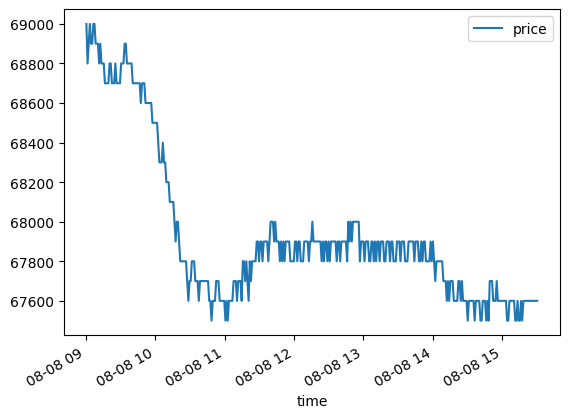

In [89]:
df.plot()

'2023-08-08 09:00:39'

In [121]:
df.Close[-2] * pred_y[-2] / dfy.Close[-2]

array([73573.51036723])

In [118]:
df.Close[-1] * pred_y[-1] / dfy.Close[-1]

array([69593.46794484])

In [133]:
df = fdr.DataReader('005930', '2021-08-07', '2023-08-08')  #NHN주식정보
dfclose = df['Close']

In [134]:
return_df = dfclose.pct_change(60)

In [135]:
return_df

Date
2021-08-09         NaN
2021-08-10         NaN
2021-08-11         NaN
2021-08-12         NaN
2021-08-13         NaN
                ...   
2023-08-02    0.060698
2023-08-03    0.053599
2023-08-04    0.057276
2023-08-07    0.066978
2023-08-08    0.054602
Name: Close, Length: 494, dtype: float64